# Opgave DBSCAN

In deze opgave gaan we voor de verandering werken met de iris-dataset. We hebben hiervoor gekozen omdat het een fijne kleine en overzichtelijke dataset is en omdat deze inmiddels al voldoende is toegelicht.

Omdat we nu unsupervised te werk gaan, maken we geen gebruik van de `y`-vector. We willen kijken of we een [DBSCAN-model](https://scikit-learn.org/stable/modules/clustering.html#dbscan) kunnen maken dat de data in verschillende klassen kan classificeren. Om deze classificatie inzichtelijk te maken, hebben we een hulpfunctie `plot_dbscan` gemaakt, die je hieronder ziet staan. Bestudeer eventueel deze code om een beeld te krijgen van hoe hij werkt en wat de bedoeling is.

Run de onderstaande cel om de noodzakelijke imports uit te voeren.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

Run de onderstaande cel om de methode `plot_dbscan` te definiëren.

In [2]:
def plot_dbscan(model, X, **labels):
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True
    anomalies_mask = model.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = model.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=100, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='^', s=20, label='klasse')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100, label='uitbijter')
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".", label='non-core')
    
    x_str = '$x_1$' if not 'xlabel' in labels else labels['xlabel']
    y_str = '$x_2$' if not 'ylabel' in labels else labels['ylabel']
    plt.xlabel(x_str, fontsize=14)
    plt.ylabel(y_str, fontsize=14)
    plt.legend()
    plt.title(f"eps={model.eps:.2f}, min_samples={model.min_samples}", fontsize=14)

Laad de iris-dataset van uit `sklearn-datasets`. Zoals tijdens het theoriecollege is toegelicht zijn &epsilon; (`eps`) en het aantal samples in de omgeving van het gekozen datapunt de belangrijkste parameters van DBSCAN. Maak verschillende modellen met (in ieder geval) de onderstaande waarden voor deze parameters. Maak telkens een plot en registreer het aantal klassen, uitbijters en non-core observaties.

```
  min_samples: [3, 4, 5, 7, 9]
  eps{ [.1, .4, .55, .6, 1, 2]
```

Maak vervolgens een interessante visualisatie van deze gegevens om inzichtelijk te krijgen wat de effecten van de verschillende waarden voor deze parameters zijn. Kun je verklaren wat er gebeurt?

Antwoord: 

In [3]:
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

model1 = DBSCAN(eps=0.1, min_samples=3)
model1.fit(X)

model2 = DBSCAN(eps=0.4, min_samples=4)
model2.fit(X)

model3 = DBSCAN(eps=0.55, min_samples=5)
model3.fit(X)

model4 = DBSCAN(eps=0.6, min_samples=7)
model4.fit(X)

model5 = DBSCAN(eps=1, min_samples=9)
model5.fit(X)


DBSCAN(eps=1, min_samples=9)

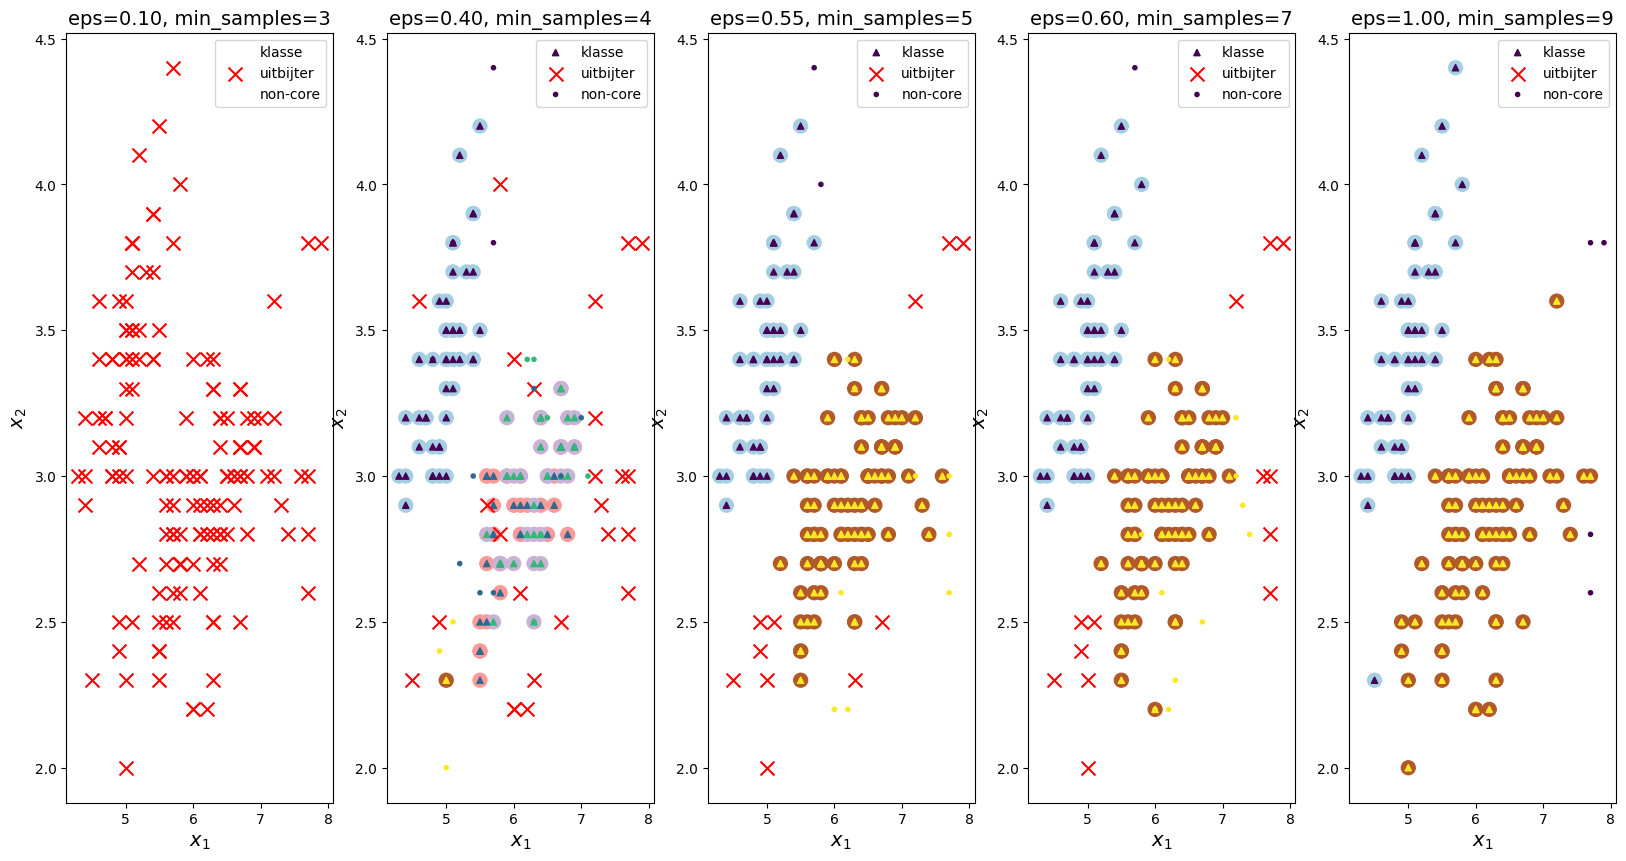

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(151)
plot_dbscan(model1, X)

plt.subplot(152)
plot_dbscan(model2, X)

plt.subplot(153)
plot_dbscan(model3, X)

plt.subplot(154)
plot_dbscan(model4, X)

plt.subplot(155)
plot_dbscan(model5, X)